Markdown basics (http://daringfireball.net/projects/markdown/basics)
# NY Taxi Rides

### Data Provided by the New York City Taxi and Limousine Commission.
Full dataset is 170 million taxi trips, 100GB of free space. Our subset is 0.5% of all trips, about 850,000 rides. Download the dataset from Cyrille Rossant on GitHub: https://github.com/ipython-books/minibook-2nd-data (https://github.com/ipython-books/minibook-2nd-data) NYC Taxi & Limousine Commission website (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml) NYC Gov data description website (http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data=pd.read_csv("nyc_data.csv")#Upload the data

head() method of DataFrames displays the first three lines of the table

In [3]:
data.head()#Display the data

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


In [4]:
data.shape # There are 846945 rows and 14 columns

(846945, 14)

In [5]:
data.ndim # Dimensions are two

2

In [8]:
data.duplicated().sum() # There is no duplicated rows

0

In [6]:
data.isnull().sum() # In store_and_fwd_flag there are 422368 NaN values

medallion                  0
hack_license               0
vendor_id                  0
rate_code                  0
store_and_fwd_flag    422368
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_time_in_secs          0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
dtype: int64

Get the actual coordinates: four DataFrame columns
These four variables are all Series objects:

In [10]:
data.dtypes # Check vairable types of each column

medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object

In [11]:
data.describe() # Get basic statistics

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


In [42]:
# Check categorical variable frequencies
data.describe(include=['object'])

,medallion,hack_license,vendor_id,store_and_fwd_flag,pickup_datetime,dropoff_datetime
count,846945,846945,846945,424577,846945,846945
unique,13446,38391,2,2,685423,686957
top,20BA941F62CC07F1FA3EF3E122B1E9B2,03173DD93C1171DA1788E6E7D733C5A9,CMT,N,2013-02-14 19:36:00,2013-01-20 01:03:00
freq,125,97,424678,414599,9,9


In [12]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [13]:
# a Series is an indexed list of values.
p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [70]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [71]:
# Get pickup coordinates from pickup latitude and longitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
py.head()

0   -37.572749
1   -37.586007
2   -37.566187
3   -37.582580
4   -37.575746
Name: pickup_latitude, dtype: float64

Display a scatter plot of pickup locations
Matplotlib scatter function makes a scatter plot of x vs y, where x and y are sequence like objects of the same
length.
Documentation: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
(http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

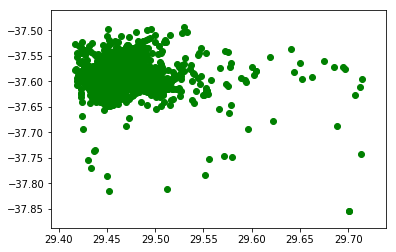

In [79]:
plt.scatter(px, py, c='g') # Display a scatter plot of pick up locations.  

In [23]:
# For which vendor is it easiest to find a cab?
len(data[data.vendor_id=='VTS'].groupby(['pickup_longitude','pickup_latitude']).size())

416171

In [24]:
len(data[data.vendor_id=='CMT'].groupby(['pickup_longitude','pickup_latitude']).size()) 
# CMT has more pick up locations therefore CMT vendor is more easier to find a cab

419191

### Customize our plot:
- Make markers smaller
- Make fewer points by making some points transparent
- Zoom in around Manhattan
- Make figure bigger
- Don't display the axes

plt or matplotlib.pyplot is a collection of command style functions. Each pyplot function makes some change to
a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates
the plot with labels, etc. ...

(29.4, 29.55, -37.63, -37.54)

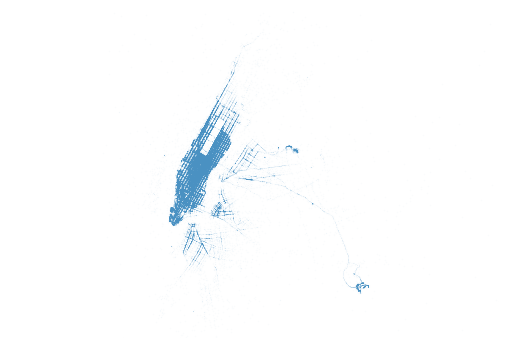

In [23]:
# Specify the figure size
plt.figure(figsize=(8, 6))
# s argument is used to make the marker size smaller
# alpha specifies opacity
plt.scatter(px, py, s=.1, alpha=0.03)
# equal aspect ratio
plt.axis('equal')
# zoom in
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
# remove the axes
plt.axis('off')

## Display a histogram of the trip distances.
pandas Series hist() draws histogram of the input Series using Matplotlib: documentation
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html).

Manhattan Island is 13.4 miles long and 2.3 miles wide.

What is a histogram? (https://statistics.laerd.com/statistical-guides/understanding-histograms.php)
numpy linspace() returns evenly spaced numbers over a specified interval.
Parameters: start - interval start; stop - interval stop; num - number of numbers. numpy linspace()
documentation (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)


In [26]:
bin_array = np.linspace(start=0., stop=10., num=100)
bin_array

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

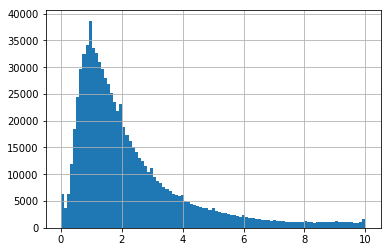

In [27]:
data.trip_distance.hist(bins=bin_array)

In [28]:
data.trip_distance.value_counts(bins=bin_array).idxmax()
# The most common trip distance based on bin_array locates in 0.909 to 1.01

Interval(0.909, 1.01, closed='right')

In [34]:
data.loc[:,"trip_distance"].mode()
# Therefore the most common trip distance is 1.0

0    1.0
dtype: float64

In [10]:
fare=pd.read_csv("nyc_fare.csv")# Upload the fare data

In [11]:
fare.head() # Get basic statistics

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,2013-01-01 00:00:00,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,2013-01-01 00:05:00,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,2013-01-01 00:05:52,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,2013-01-01 00:06:00,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,2013-01-01 00:06:00,CSH,6.5,0.5,0.5,0.0,0.0,7.5


In [12]:
fare.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,846945.000000,846945.000000,846945.000000,846945.00000,846945.000000,846945.000000
mean,12.190578,0.320303,0.499305,1.34466,0.232142,14.587073
std,9.514150,0.772642,0.057844,2.09149,1.109164,11.380950
min,-648.420000,-1.000000,-0.500000,0.00000,0.000000,-52.500000
25%,6.500000,0.000000,0.500000,0.00000,0.000000,8.000000
50%,9.500000,0.000000,0.500000,1.00000,0.000000,11.000000
75%,14.000000,0.500000,0.500000,2.00000,0.000000,16.500000
max,620.010000,628.840000,41.490000,200.00000,100.660000,620.010000


In [14]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846945 entries, 0 to 846944
Data columns (total 11 columns):
medallion          846945 non-null object
hack_license       846945 non-null object
vendor_id          846945 non-null object
pickup_datetime    846945 non-null object
payment_type       846945 non-null object
fare_amount        846945 non-null float64
surcharge          846945 non-null float64
mta_tax            846945 non-null float64
tip_amount         846945 non-null float64
tolls_amount       846945 non-null float64
total_amount       846945 non-null float64
dtypes: float64(6), object(5)
memory usage: 71.1+ MB


In [13]:
fare.duplicated().sum() # There is no duplicated rows

0

In [43]:
# Check categorical variable frequencies
fare.describe(include=['object'])

,medallion,hack_license,vendor_id,pickup_datetime,payment_type
count,846945,846945,846945,846945,846945
unique,13446,38391,2,685423,5
top,20BA941F62CC07F1FA3EF3E122B1E9B2,03173DD93C1171DA1788E6E7D733C5A9,CMT,2013-02-14 19:36:00,CRD
freq,125,97,424678,9,456019


In [44]:
bin_array2 = np.linspace(start=0., stop=80., num=100)
bin_array2

array([ 0.        ,  0.80808081,  1.61616162,  2.42424242,  3.23232323,
        4.04040404,  4.84848485,  5.65656566,  6.46464646,  7.27272727,
        8.08080808,  8.88888889,  9.6969697 , 10.50505051, 11.31313131,
       12.12121212, 12.92929293, 13.73737374, 14.54545455, 15.35353535,
       16.16161616, 16.96969697, 17.77777778, 18.58585859, 19.39393939,
       20.2020202 , 21.01010101, 21.81818182, 22.62626263, 23.43434343,
       24.24242424, 25.05050505, 25.85858586, 26.66666667, 27.47474747,
       28.28282828, 29.09090909, 29.8989899 , 30.70707071, 31.51515152,
       32.32323232, 33.13131313, 33.93939394, 34.74747475, 35.55555556,
       36.36363636, 37.17171717, 37.97979798, 38.78787879, 39.5959596 ,
       40.4040404 , 41.21212121, 42.02020202, 42.82828283, 43.63636364,
       44.44444444, 45.25252525, 46.06060606, 46.86868687, 47.67676768,
       48.48484848, 49.29292929, 50.1010101 , 50.90909091, 51.71717172,
       52.52525253, 53.33333333, 54.14141414, 54.94949495, 55.75

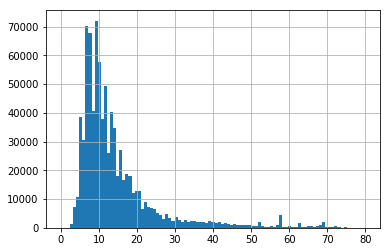

In [46]:
## Display a histogram of the fare total amounts
fare.total_amount.hist(bins=bin_array2)

In [47]:
# The most common fare total_amount based on bin_array locates in 8.899 to 9.697
fare.total_amount.value_counts(bins=bin_array2).idxmax()

Interval(8.889, 9.697, closed='right')

In [54]:
print("From the hitogram of the fare total amounts, the fare could vary from 5 to 20 if we only set the frequency at 10000, but the total amount of fare mostly are in the range of 6 to 10.")

From the hitogram of the fare total amounts, the fare could vary from 5 to 20 if we only set the frequency at 10000, but the total amount of fare mostly are in the range of 6 to 10.


## Filtering with boolean indexing
### Select long rides

data.loc[data.trip_distance > 100]

In [39]:
long_ride=data.loc[data.trip_distance > 100]
long_ride

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
504497,7237EC7ABD6114EDDC87A3AA846F8418,D52502537E2DF62C9BFFECF5A387E7E9,CMT,1,N,2013-08-02 11:22:31,2013-08-02 11:33:03,1,631,6005123.0,-73.997467,40.736397,-73.991882,40.764629
507107,50DA72F510E2F84A42712E13744FAC7B,EA9D03A766C1D32A6668FFF0C1EB4E4B,CMT,1,N,2013-08-04 18:42:17,2013-08-04 20:37:19,3,4290965,181.8,-73.978020,40.765167,-73.815041,40.730076
548988,A978A0AAE9B2CFEE310FACD97A09C319,CE56A27F53ABF411094B6CD708BFBA96,CMT,1,N,2013-08-24 17:03:27,2013-08-24 17:03:29,1,1,442.0,-73.993896,40.702644,-73.993874,40.702637
558665,5A5C516A820FE476E9D3E14101B669AC,C24585AA866FC76A4E09A05F55DC7E54,CMT,2,N,2013-08-29 10:01:40,2013-08-29 11:52:20,1,6640,164.4,-73.791534,40.661026,-73.983734,40.765778


In [50]:
len(long_ride)

4

In [49]:
print ("There are four unusually long trips (greater than 100 miles) I saw.")

There are four unusually long trips (greater than 100 miles) I saw.


In [ ]:
#End